In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import DataFrame

# scipyの統計パッケージも使います。
from scipy import stats

# 描画のためのライブラリです。
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#seabornをこれで読み込む
sns.set()

#edgecolorを変えた
plt.rcParams['patch.edgecolor'] = 'black'

# ブラウザ内に画像を埋め込むための命令です
%matplotlib inline

　　

In [2]:
#プロファイル
import pandas_profiling

# ファイルを読み込んで、DataFrameを作ります。
titanic_df = pd.read_csv('train.csv')

titanic_df.head()

#slibspは兄弟と乗っていたか1
#parchは親子で乗っていたか、乗っていれば１
#cabinは当時いたとこ
#embarkedは乗り込んだ港

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId – 乗客識別ユニークID
Survived – 生存フラグ（0=死亡、1=生存）
Pclass – チケットクラス
Name – 乗客の名前
Sex – 性別（male=男性、female＝女性）
Age – 年齢
SibSp – タイタニックに同乗している兄弟/配偶者の数
parch – タイタニックに同乗している親/子供の数
ticket – チケット番号
fare – 料金
cabin – 客室番号
Embarked – 出港地（タイタニックへ乗った港）


pclass = チケットクラス
1 = 上層クラス（お金持ち）
2 = 中級クラス（一般階級）
3 = 下層クラス（労働階級）


Embarked = 各変数の定義は下記の通り
C = Cherbourg
Q = Queenstown
S = Southampton


In [3]:
# データの概要です。
titanic_df.info()
#891のデータ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_df.isnull().sum()
#nunの合計数

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#色々出してくれる
pandas_profiling.ProfileReport(titanic_df)

#以下htmlファイル化
#profile_rep = pandas_profiling.ProfileReport(titanic_df)
#profile_rep.to_file(outputfile="myoutputfile.html")


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [7]:
#相関関係がわかるよ
#method='pearson'
titanic_df.corr()
#
#titanic_df.corr(method='kendall')
#
#titanic_df.corr(method='spearman')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


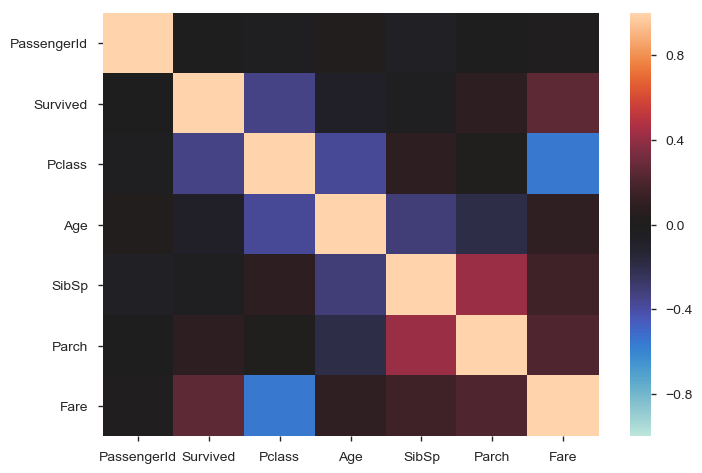

In [8]:
corr=titanic_df.corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0)

In [9]:
def kesson_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns
 
kesson_table(titanic_df)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


# 欠損値
cabin無視　ageは色々 embarkは最頻値のS

In [10]:
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())
#medianは中央値
#meanは平均値穴埋め
#modeは最頻値

titanic_df["Embarked"] = titanic_df["Embarked"].fillna("X")
 
 
kesson_table(titanic_df)

,欠損数,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


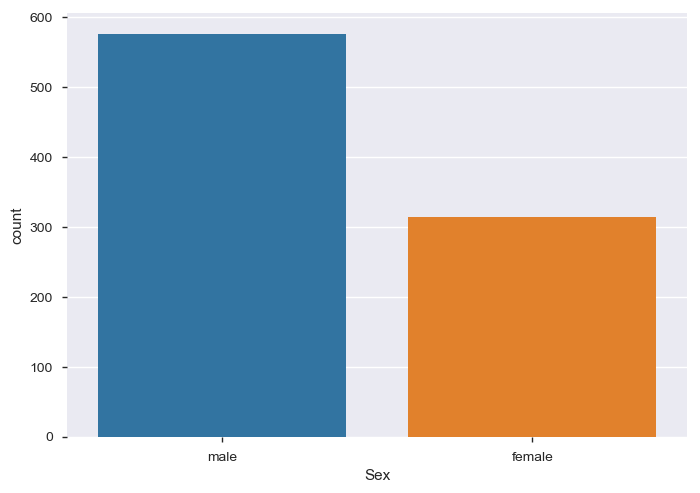

In [11]:
# 性別チェック
sns.countplot('Sex',data=titanic_df)

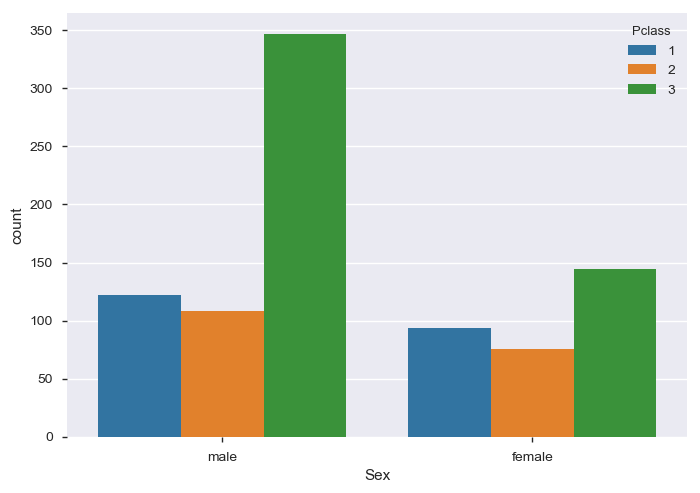

In [12]:
# 乗客の性別を客室で層別化してみましょう。
sns.countplot('Sex',data=titanic_df,hue='Pclass')

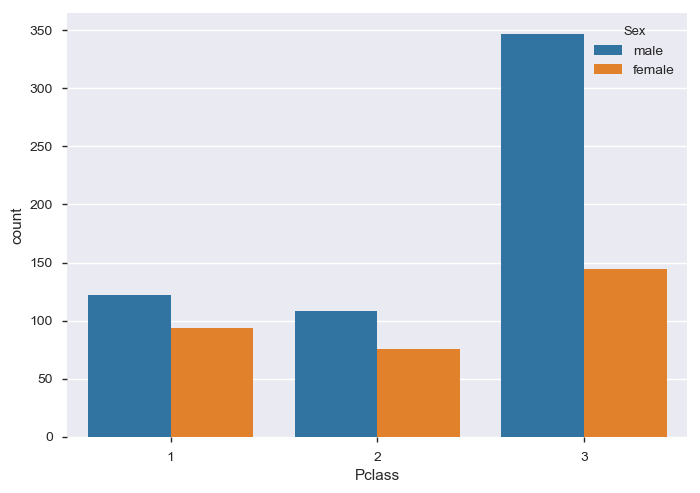

In [13]:
# 今度は、乗客の客室を性別で層別化してみましょう。
sns.countplot('Pclass',data=titanic_df,hue='Sex')

3等客室は女性に比べて、男性が圧倒的に多い事がわかります。
子供という概念を導入して、さらに客層を詳しく調べてみましょう。

In [14]:
# 16歳未満を子供とします。
# レクチャー45で学んだ知識を使います。

def male_female_child(passenger):
    # 年齢と性別のデータを取得します。
    age,sex = passenger
    # 年齢を調べて16歳未満なら、子供。それ以外は性別をそのまま返します。
    if age < 16:
        return 'child'
    else:
        return sex
    
# personという新しい列を追加します。
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [15]:
# 最初の10行を確認してみましょう。
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


これで、男性、女性、子供という列が出来ました。これは後で、「女性と子供を先に！」という考えが実践されていたかどうかを確認するのに使います。

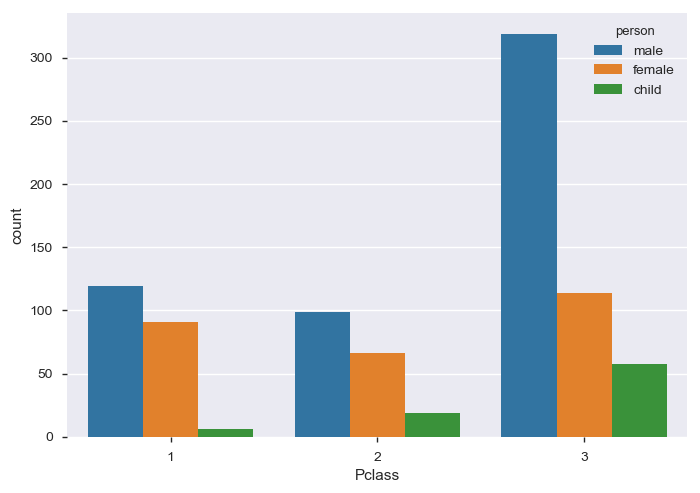

In [16]:
# 再び、客室の種類別で人数を数えます。
sns.countplot('Pclass',data=titanic_df,hue='person')

3等客室には沢山の子供がいたのに、1等客室にはほとんど居ません。年齢に関する分布をも少し詳しく見てみましょう。

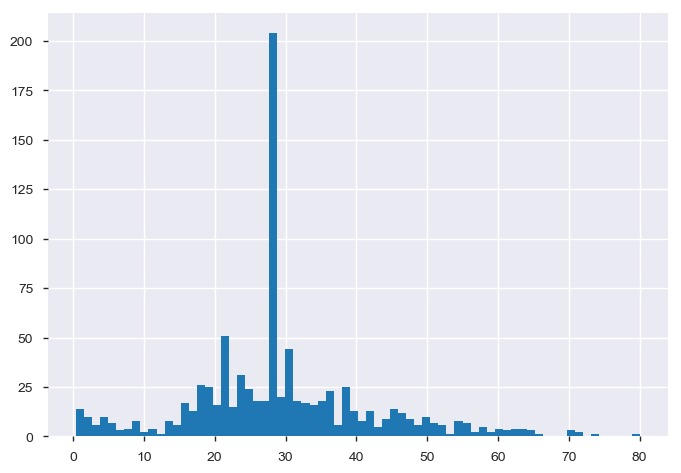

In [17]:
# pandasで簡単にヒストグラムを描く方法です。
titanic_df['Age'].hist(bins=70)

In [18]:
titanic_df['Age'].mean()

29.36158249158249

In [19]:
# 数の小計を出すことも可能です。
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

<hr>

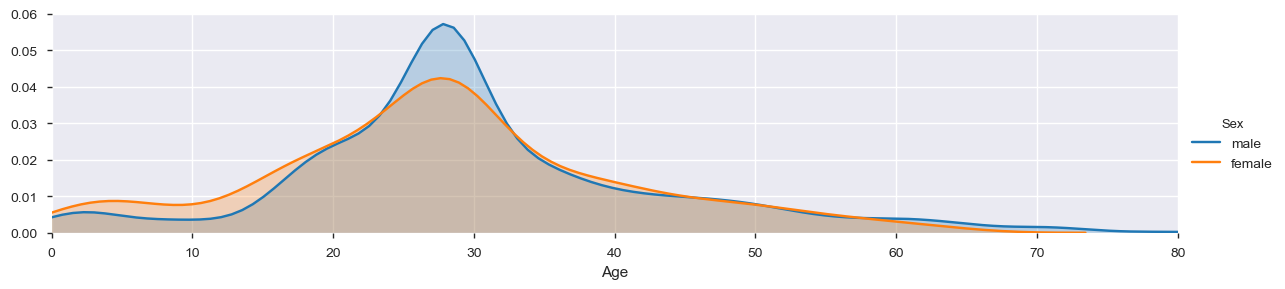

In [20]:
# FacetGridを使うと、複数のカーネル密度推定のグラフを1つのプロットに描くことができます。

# 性別で層別化して、グラフを少し横長に設定します。
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# mapを使って、性別ごとにkdeplotを描くようにします。
fig.map(sns.kdeplot,'Age',shade= True)

# xの最大値を長老に合わせます。
#予想が実際の最高年齢を超える場合があるから
oldest = titanic_df['Age'].max()

# x軸の範囲を設定します。
fig.set(xlim=(0,oldest))

# 凡例を付け加えておきましょう。
fig.add_legend()

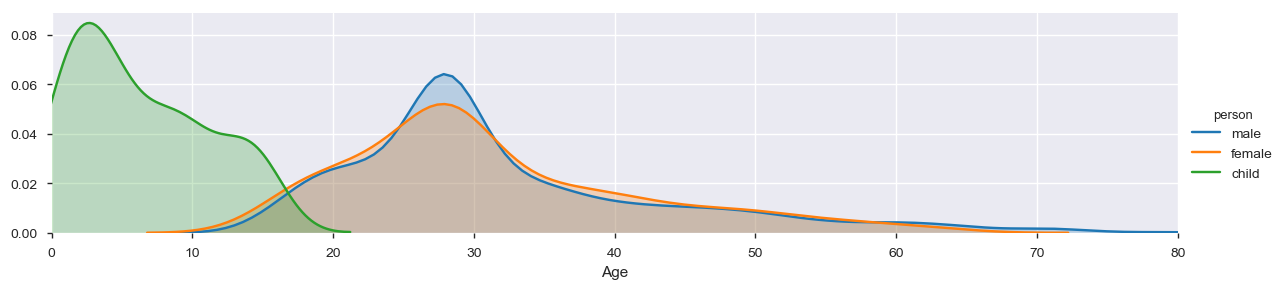

In [21]:
# person列について同じ事をやれば、子供も含めたKDE plotが描けます。

fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

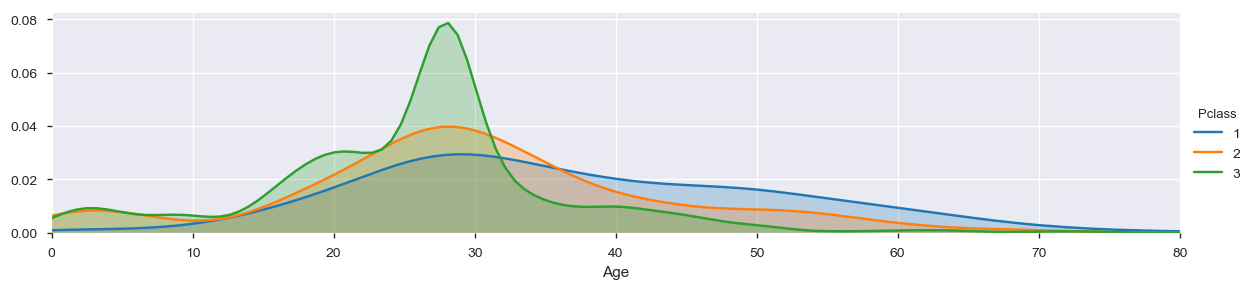

In [22]:
# こんどは、客室別に同じことをやってみましょう。
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


性別、年齢、客室の種類など、乗客の全体像がよくわかって来たと思います。
次の質問に移りましょう。
それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？

In [23]:
# 再び、データの概要です。
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Cabinという列が、それぞれの乗客が居た場所ですが、NaN値があるので、まずはこれを除去します。

In [24]:
# NaNを消して、deckという新しいオブジェクトを作ります。
deck = titanic_df['Cabin'].dropna()

In [25]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [26]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

実は、最初の1文字だけあれば、どこにいたのか分かります。

In [27]:
for le in deck:
    print(le[0])

C
C
E
G
C
D
A
C
B
D
B
C
B
C
F
F
C
E
A
D
D
C
B
E
D
F
D
C
B
F
C
E
B
A
C
F
A
F
B
B
G
A
D
D
C
C
C
D
G
C
B
E
B
C
C
C
D
A
B
D
C
C
B
E
C
C
E
C
B
C
E
C
D
B
C
C
C
E
T
F
C
F
C
E
D
B
E
C
B
D
G
C
E
C
E
B
C
A
C
C
C
E
D
E
E
D
A
B
C
B
C
D
C
B
C
E
D
F
B
B
C
B
B
B
C
C
A
E
C
E
E
C
A
E
B
D
A
C
F
D
D
D
A
B
B
D
A
D
E
C
B
B
D
B
B
C
F
C
E
E
C
C
C
F
C
E
E
B
B
D
C
B
B
D
E
B
B
D
E
F
B
B
D
B
D
B
A
E
B
B
E
B
E
C
C
D
E
D
A
D
B
C
B
C


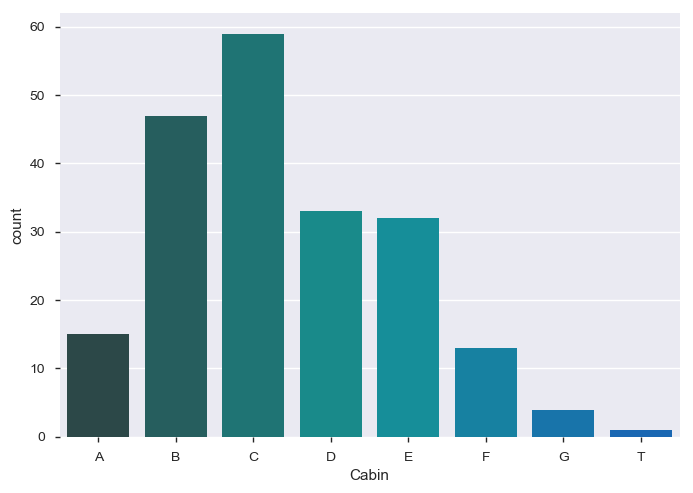

In [28]:
# シンプルに、for文で取り出してみましょう。

levels = []

# 1文字目を取り出します。
for level in deck:
    levels.append(level[0])    

# DataFrameを作って、プロットします。
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
#キャビンだけのカラム
sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=sorted(set(levels)))

Tだけ離れているので、恐らく、間違ったデータです。

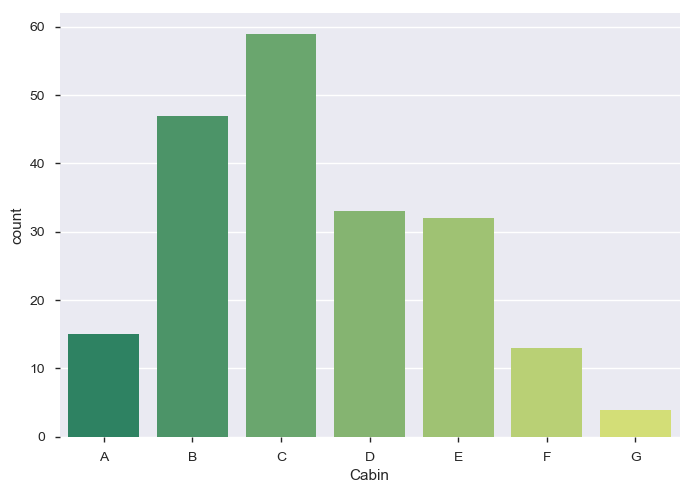

In [29]:
# T以外のデータだけから新しくDataFrameを作ります。
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#orderが無いとデータがバラバラに出力されて見にくい
sns.countplot('Cabin',data=cabin_df,palette='summer',order=sorted(set(cabin_df['Cabin'])))

グラフの色合いは、お好きなように変更できます。以下のリンクからお気に入りを探してみてください。
また、それぞれのpalette名には、「_d」を付けると、少し暗い色味になります。

リンク: http://matplotlib.org/users/colormaps.html

    乗客は主に、どこから来たのか？

In [30]:
# 
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


乗船した場所を示す「Embarked」列には、C,Q,S という値が入っています。
Kaggleのページを参照すると、それぞれCherbourg, Queenstown, Southhamptonだということがわかります。

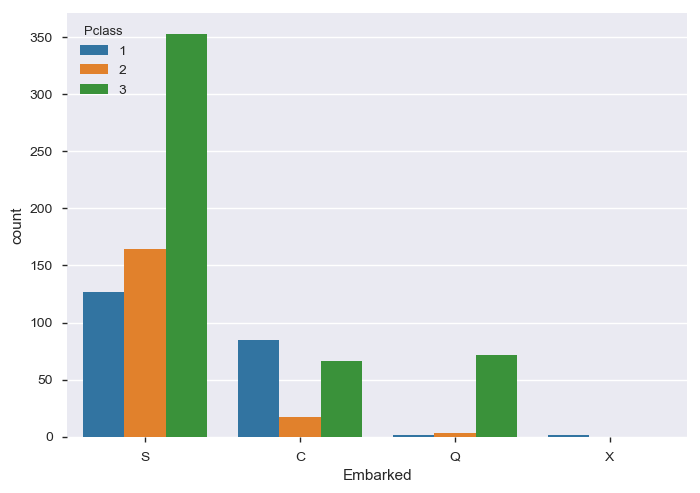

In [31]:
# orderで順番を指定できます。
sns.countplot('Embarked',data=titanic_df,hue='Pclass')

In [32]:
# 実はNaNがあります。
from collections import Counter
Counter(titanic_df.Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, 'X': 2})

In [33]:
titanic_df.Embarked.value_counts()
#nulが勝手には弾いてくれるが勝手に弾くんだよ

S    644
C    168
Q     77
X      2
Name: Embarked, dtype: int64

Queenstownからの乗客のほとんどが、3等客室です。これは、当時のこの地域の経済が余り良くなかった事を反映しているのかも知れません。

<hr>

それでは、4つめの質問です。

    4.) 家族連れか？単身者か？

In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [35]:
# 単身者かどうかを示す新しい列を追加しましょう。

# 親子、兄弟姉妹を示す列を足し合わせます。
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

Alone列が0でなければ、その乗客は誰かと一緒に乗船したことが分かります。
1人（Alone）と家族と（With Family）に分けてみましょう。

In [36]:
# 数字を、文字列に変換します。
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

# 警告がでることがありますが、無視して構いません。詳しくは、以下を参照してみてください。
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

In [37]:
# 確認しておきましょう。
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


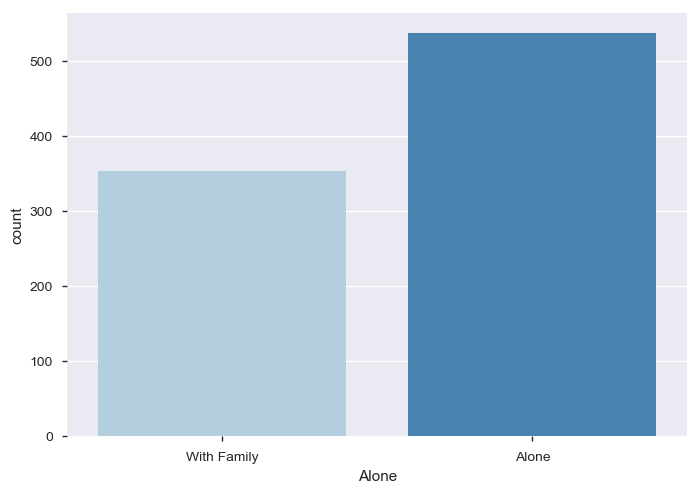

In [38]:
# とりあえず描画してみます。
sns.countplot('Alone',data=titanic_df,palette='Blues')

それでは最後に最も興味深い問いである、どのよな要因が生死を分けたのかを見ていくことにしましょう。

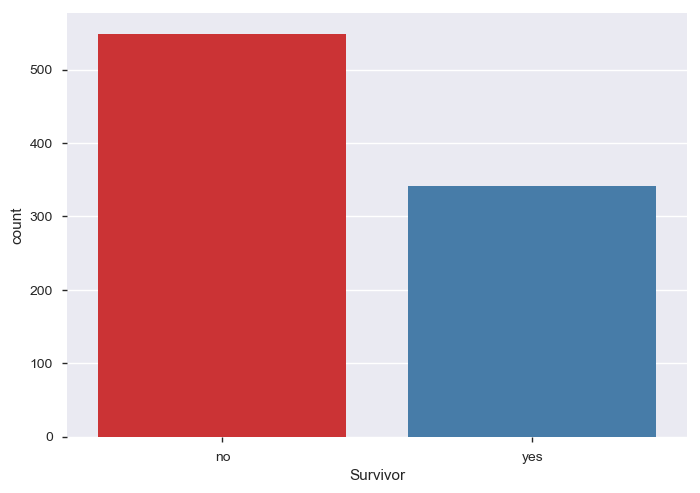

In [39]:
# 「Survivor」という新しい列を作ります。
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

sns.countplot('Survivor',data=titanic_df,palette='Set1')

In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


### ピポットテーブルとシーボーン

>ピポットテーブル  
>https://deepage.net/features/pandas-pivot.html  
>タイタニックでも使えるで！

クロス集計を行うにあたって、データの出現頻度をまとめたい場合はcrosstab関数が有効です。  

平均や合計などの統計量を知りたい場合や属性ごとにまとめたい場合はpivot_table関数を使いましょう。  

>クロス集計 crosstab  
>https://deepage.net/features/pandas-crosstab.html

In [41]:
import numpy as np
from numpy.random import randn
import pandas as pd

# scipyの統計パッケージも使います。
from scipy import stats

# 描画のためのライブラリです。
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#seabornをこれで読み込む
sns.set()

#edgecolorを変えた
plt.rcParams['patch.edgecolor'] = 'black'

# ブラウザ内に画像を埋め込むための命令です
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [42]:
flight_dframe_ori = sns.load_dataset('flights')
#flight_dframe=pd.read_csv("flights.csv")

In [43]:
flight_dframe_ori.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [44]:
#pivotテーブルを作るとヒートマップ作りやすい
flight_dframe = flight_dframe_ori.pivot('month','year','passengers')
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [45]:
#flight_dframe
momoth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

flight_dframe=flight_dframe.reindex(momoth)
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


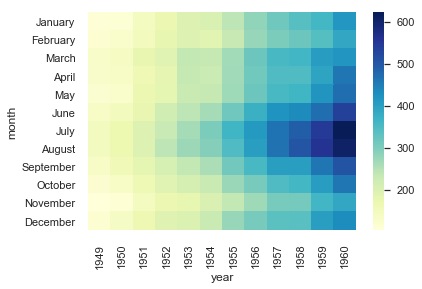

In [46]:
sns.heatmap(flight_dframe,cmap="YlGnBu")

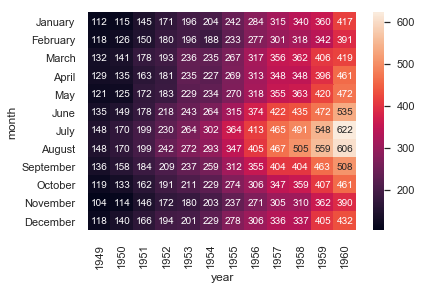

In [47]:
# 数字を書き込めます。
sns.heatmap(flight_dframe, annot=True, fmt='d')

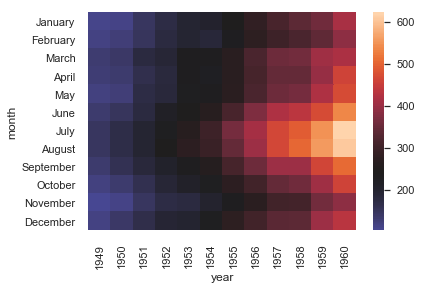

In [48]:
#中心を指定して、色を変えられます。
sns.heatmap(flight_dframe, center=flight_dframe.loc['January',1955])

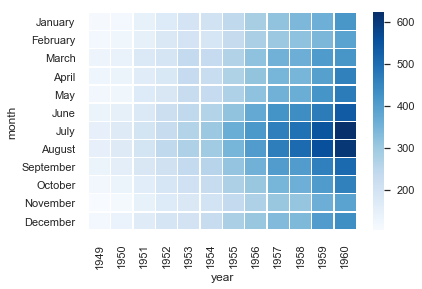

In [49]:
#境界線を入れられる
sns.heatmap(flight_dframe, linewidth=.4, cmap="Blues")
#cmap jet Reds Blues

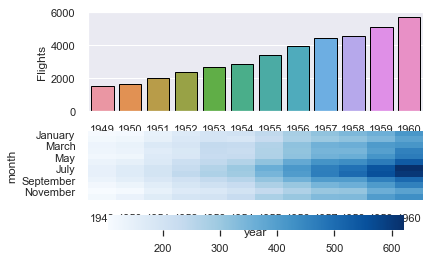

In [50]:
f, (axis1, axis2) = plt.subplots(2,1)


#合計値が年代別に格納される
yearly_flights = flight_dframe.sum()
#年代をとってくる
years = pd.Series(yearly_flights.index.values)
#データフレーム化
years = pd.DataFrame(years)

#年ごとの値
flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation':'horizontal'})

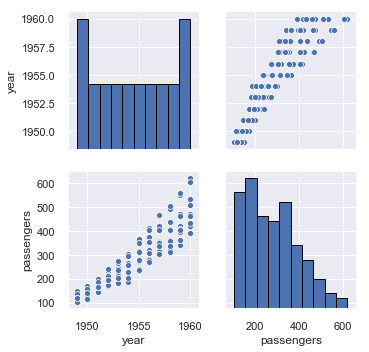

In [51]:
sns.pairplot(flight_dframe_ori)

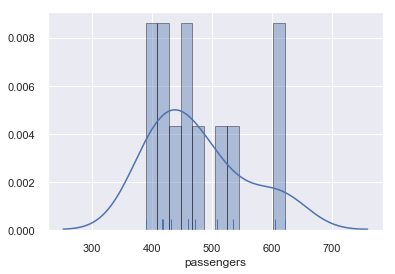

In [52]:

# カーネル密度推定とヒストグラムを描きます
#hist=Falseで消したりできる
#binは何個に分けるか
#rug=Trueで下のチョロチョロ出せる
sns.distplot(flight_dframe_ori[flight_dframe_ori["year"]==1960]["passengers"],bins=12,rug=True)
#flight_dframe_ori[flight_dframe_ori["year"]==1960]

* a
 * a
   * a

**BOLD**

*[URL](https://www.google.com)*  
**[URL](https://www.google.com)**

* a
 * a
   * a

**BOLD**

*[URL](https://www.google.com)*  
**[URL](https://www.google.com)**

<details>
    <summary>Details</summary>
    Something small enough to escape casual notice.
</details>

<details>
    <summary>Details</summary>
    Something small enough to escape casual notice.
</details>

 ```python3:a.py
if momo > 10:
    print("yer")
```

 ```python3:a.py
if momo > 10:
    print("yer")
```

**[数式１](https://qiita.com/namoshika/items/63db972bfd1030f8264a)**  
**[数式２](https://qiita.com/PlanetMeron/items/63ac58898541cbe81ada)**